In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Convert to 1D array
y_test = pd.read_csv('y_test.csv').values.ravel()

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data loaded successfully!")

Training set: (5634, 26)
Test set: (1409, 26)
Data loaded successfully!


In [2]:
# Train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]  # Probability of churn

# Evaluate
print("="*60)
print("LOGISTIC REGRESSION RESULTS")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_log):.4f}")

LOGISTIC REGRESSION RESULTS

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


ROC-AUC Score: 0.8461


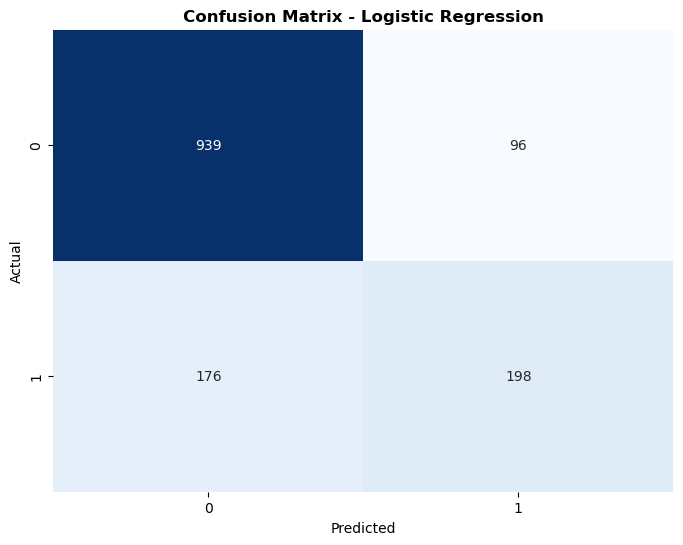


Out of 374 churners, we caught 198 (52.9%)
We missed 176 churners (False Negatives)


In [3]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nOut of {cm[1,1] + cm[1,0]} churners, we caught {cm[1,1]} ({cm[1,1]/(cm[1,1]+cm[1,0])*100:.1f}%)")
print(f"We missed {cm[1,0]} churners (False Negatives)")

In [4]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("="*60)
print("RANDOM FOREST RESULTS")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\nOut of {cm_rf[1,1] + cm_rf[1,0]} churners, we caught {cm_rf[1,1]} ({cm_rf[1,1]/(cm_rf[1,1]+cm_rf[1,0])*100:.1f}%)")
print(f"We missed {cm_rf[1,0]} churners (False Negatives)")


RANDOM FOREST RESULTS

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


ROC-AUC Score: 0.8412

Out of 374 churners, we caught 186 (49.7%)
We missed 188 churners (False Negatives)


In [6]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("="*60)
print("XGBOOST RESULTS")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"\nOut of {cm_xgb[1,1] + cm_xgb[1,0]} churners, we caught {cm_xgb[1,1]} ({cm_xgb[1,1]/(cm_xgb[1,1]+cm_xgb[1,0])*100:.1f}%)")
print(f"We missed {cm_xgb[1,0]} churners")

XGBOOST RESULTS

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


ROC-AUC Score: 0.8403

Out of 374 churners, we caught 199 (53.2%)
We missed 175 churners


In [7]:
# Get feature importance from Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top 10 Features Driving Churn:")
print(feature_importance.head(10))

Top 10 Features Driving Churn:
                        Feature  Coefficient
19            Contract_Two year    -1.603531
16  InternetService_Fiber optic     1.304977
17           InternetService_No    -1.057992
23             avg_monthly_cost    -0.939935
4                        tenure    -0.758271
18            Contract_One year    -0.748598
6                 MultipleLines     0.458462
12              StreamingMovies     0.452883
11                  StreamingTV     0.438327
13             PaperlessBilling     0.377251


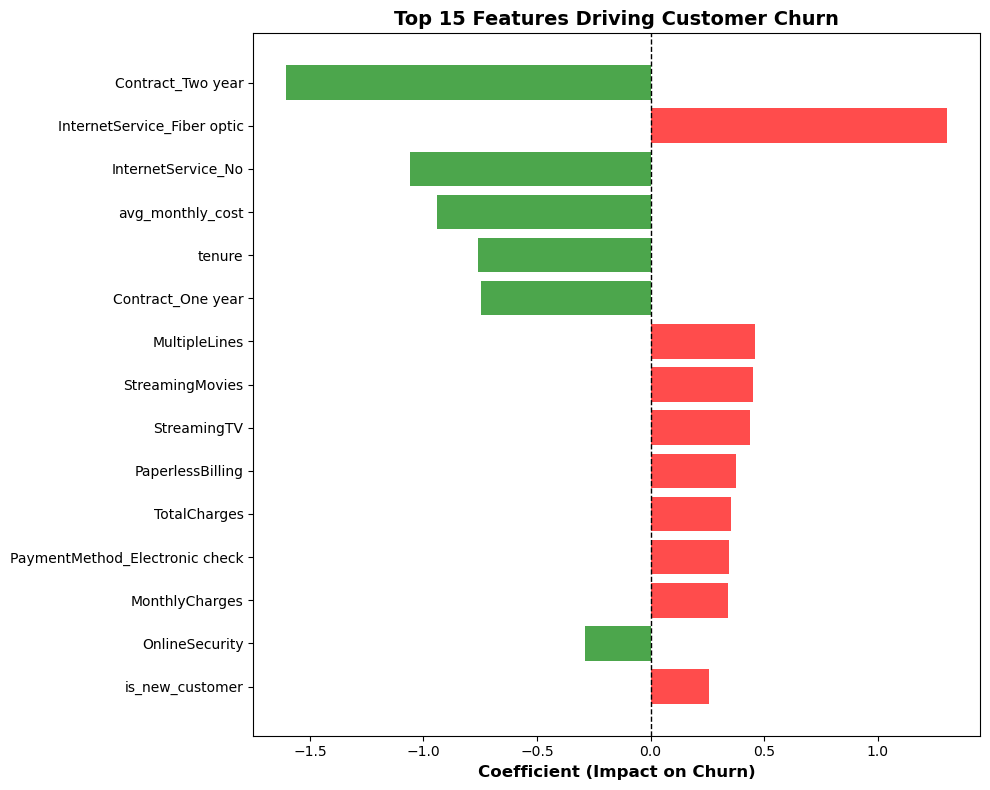


Green = Reduces Churn
Red = Increases Churn


In [8]:
# Visualize Top 15 Features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 8))
colors = ['green' if x < 0 else 'red' for x in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient (Impact on Churn)', fontsize=12, fontweight='bold')
plt.title('Top 15 Features Driving Customer Churn', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nGreen = Reduces Churn")
print("Red = Increases Churn")

---

## BUSINESS RECOMMENDATIONS - CUSTOMER CHURN REDUCTION STRATEGY

---

### MODEL PERFORMANCE SUMMARY
- **ROC-AUC Score:** 0.8461 (Strong predictive power)
- **Current Churn Rate:** 26.5%
- **Churners Identified:** 198/374 (53% recall)
- **High-risk customers** can be flagged for proactive intervention

---

### TOP 3 ACTIONABLE INSIGHTS

#### 1. CONTRACT TYPE - HIGHEST PRIORITY
**Finding:** Two-year contracts reduce churn by 40+ percentage points
- Month-to-month contracts: **42.7% churn**
- Two-year contracts: **2.8% churn**

**Recommendation:**
- Offer discounts for customers switching from month-to-month to 1-year or 2-year contracts
- **Target:** New customers within first 90 days
- **Projected Impact:** Reduce churn from 42.7% to ~25%

---

#### 2️. FIBER OPTIC PRICING - CRITICAL ISSUE
**Finding:** Fiber customers have highest churn (41.9%) at $91/month

**Recommendation:**
- Launch Fiber Loyalty Bundle: 20% discount for 12-month commitment
- Create tiered pricing: Standard/Premium/Ultimate fiber plans
- **Projected Impact:** Reduce fiber churn from 42% to ~25%

---

#### 3. NEW CUSTOMER ONBOARDING - EARLY INTERVENTION
**Finding:** Most churn happens in first 6 months 

**Recommendation:**
  - Implement 'First 90 Days' program
  - Proactive check-in at 30, 60, 90 days
  - Dedicated support line for new customers
  - Early upgrade incentives
- **Projected Impact:** Reduce new customer churn by 15-20%

---

### ESTIMATED BUSINESS IMPACT

**Assumptions:**
- Average customer lifetime value: **$2,500**
- Current annual churners: **~1,870 customers**
- Target churn reduction: **10-15%**

**Projected Annual Savings:**
- 10% reduction: 187 customers saved × $2,500 = **$467,500**
- 15% reduction: 280 customers saved × $2,500 = **$700,000**

---

In [12]:
import pickle

# Save the trained model
with open('churn_model_logistic.pkl', 'wb') as file:
    pickle.dump(log_model, file)


print("Model saved successfully!")

Model saved successfully!


In [13]:
# Test loading the model
with open('churn_model_logistic.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make a test prediction
test_pred = loaded_model.predict(X_test[:5])
print("\nModel loaded and tested successfully!")
print(f"Sample predictions: {test_pred}")


Model loaded and tested successfully!
Sample predictions: [0 1 0 0 0]


In [14]:
# Compare predictions to actual
print("Predictions: ", test_pred)
print("Actual:      ", y_test[:5])

Predictions:  [0 1 0 0 0]
Actual:       [0 0 0 0 0]
